In [1]:
# Importing Libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import datetime as dt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
# Importing the dataset
Stroke_Data = pd.read_excel(r'Second Stroke Prediction Using Survival Analysis.xlsx')

In [3]:
# Checking the first 50 records of dataset
Stroke_Data.head(50)

,subject_id,Dob,age,Gender,admittime,dischtime,deathtime,icd9_code,Stroke Type,GCS Score,Creatinine,Glucose,Hematocrit,Potassium,First_Stroke_Date,Second_Stroke_Date,"Second Stroke occurred(Yes=1,No=0)",Date_Of_Death,"Died due to Stroke(Yes=1,No=0, Lost to Follow up=2",Latest Stroke Event /Death,First Admission,Last Event,Discharge Time,Total duration within study,isDead,Days between First and second stroke,Days between First Stroke and death,If Stroke is only event- First,Insurance,Marital Status,Ethnicity
0,14190,2122-12-25,42.94,F,2165-11-21 01:24:00,2165-11-28 17:30:00,NaT,431,Intracerebral hemorrhage,15.0,0.6,145.0,34.1,3.2,2165-11-21 01:24:00,2165-12-03 11:15:00,1,NaT,0,2165-12-03 11:15:00,2165-11-21 01:24:00,2165-12-21 01:16:00,2165-12-23 15:44:00,32.597222,0,12.410417,NaN,True,Private,SINGLE,WHITE
1,15716,2077-11-04,69.13,F,2146-12-04 21:12:00,2147-01-31 19:30:00,NaT,43311,"Late effects of cerebrovascular disease, cogni...",15.0,3.3,253.0,16.2,3.6,2146-12-04 21:12:00,2147-05-30 08:07:00,1,NaT,0,2147-07-23 12:12:00,2146-12-04 21:12:00,2147-08-19 16:30:00,2147-08-30 05:00:00,268.325000,0,176.454861,NaN,True,Medicare,SINGLE,BLACK/AFRICAN AMERICAN
2,15749,2119-03-09,55.86,F,2175-01-01 20:15:00,2175-01-17 14:59:00,NaT,431,Intracerebral hemorrhage,15.0,3.4,218.0,23.0,3.1,2175-01-01 20:15:00,2175-08-07 13:12:00,1,NaT,0,2175-08-07 13:12:00,2174-10-13 11:26:00,2181-06-24 02:31:00,2181-06-27 14:15:00,2449.117361,0,217.706250,NaN,False,Medicare,MARRIED,WHITE
3,16076,2119-06-30,54.85,M,2174-04-22 18:12:00,2174-05-06 14:17:00,NaT,431,Intracerebral hemorrhage,15.0,7.3,415.0,26.0,2.0,2174-04-22 18:12:00,2180-07-30 07:23:00,1,NaT,0,2180-07-30 07:23:00,2174-04-22 18:12:00,2182-05-20 06:20:00,2182-05-30 17:30:00,2959.970833,0,2290.549306,NaN,True,Medicaid,MARRIED,WHITE
4,18166,2070-07-27,58.81,M,2129-05-05 16:21:00,2129-05-18 11:30:00,NaT,430,Subarachnoid hemorrhage,15.0,0.7,149.0,32.5,3.5,2129-05-05 16:21:00,2129-09-02 07:15:00,1,NaT,0,2129-10-14 12:30:00,2129-05-05 16:21:00,2129-11-09 15:25:00,2129-11-14 12:30:00,192.839583,0,119.620833,NaN,True,Private,MARRIED,WHITE
5,19310,2101-05-01,79.37,F,2180-08-23 18:46:00,2180-08-26 15:45:00,NaT,431,Intracerebral hemorrhage,15.0,0.6,260.0,27.7,3.0,2180-08-23 18:46:00,2181-06-19 17:00:00,1,NaT,0,2181-06-19 17:00:00,2180-08-23 18:46:00,2181-09-15 19:03:00,2181-11-03 12:45:00,436.749306,0,299.926389,NaN,True,Medicare,MARRIED,WHITE
6,21369,2099-01-09,48.79,F,2147-10-11 22:57:00,2147-10-28 12:56:00,NaT,430,Subarachnoid hemorrhage,14.0,0.6,222.0,25.0,3.2,2147-10-11 22:57:00,2147-11-28 07:15:00,1,NaT,0,2147-11-28 07:15:00,2147-10-11 22:57:00,2148-03-20 08:00:00,2148-03-25 13:41:00,165.613889,0,47.345833,NaN,True,Medicaid,SINGLE,WHITE
7,22860,2118-09-29,38.40,F,2157-02-13 03:28:00,2157-03-11 13:33:00,NaT,430,Subarachnoid hemorrhage,15.0,0.8,162.0,30.9,3.1,2157-02-13 03:28:00,2158-06-20 23:09:00,1,NaT,0,2159-02-19 17:51:00,2157-02-13 03:28:00,2159-03-12 21:45:00,2159-03-17 10:30:00,762.293056,0,492.820139,NaN,True,Medicaid,MARRIED,WHITE
8,22933,2055-03-02,53.33,F,2108-06-18 22:15:00,2108-06-23 16:30:00,NaT,430,Subarachnoid hemorrhage,15.0,2.9,243.0,21.9,2.9,2108-06-18 22:15:00,2110-02-03 16:03:00,1,NaT,0,2111-04-18 23:07:00,2108-06-18 22:15:00,2111-07-29 20:31:00,2111-09-02 15:15:00,1170.708333,0,594.741667,NaN,True,Private,MARRIED,WHITE
9,25528,2023-05-14,78.77,F,2102-01-31 21:44:00,2102-02-21 13:25:00,NaT,430,Subarachnoid hemorrhage,15.0,0.7,150.0,29.6,3.2,2102-01-31 21:44:00,2102-04-27 15:31:00,1,NaT,0,2102-04-27 15:31:00,2102-01-31 21:44:00,2103-01-11 12:00:00,2103-01-13 12:00:00,346.594444,0,85.740972,NaN,True,Medicare,MARRIED,WHITE


In [4]:
# Checking the dimesion of data
Stroke_Data.dtypes

subject_id                                                     int64
Dob                                                   datetime64[ns]
age                                                          float64
Gender                                                        object
admittime                                             datetime64[ns]
dischtime                                             datetime64[ns]
deathtime                                             datetime64[ns]
icd9_code                                                      int64
Stroke Type                                                   object
GCS Score                                                    float64
Creatinine                                                   float64
Glucose                                                      float64
Hematocrit                                                   float64
Potassium                                                    float64
First_Stroke_Date                 

There are few columns which are reduentent in my study of prediction Second Stroke, hence I will drop the. subject_id, DOB (we have age), admittime, disctime (adding a columns to count no. of days stay in hospital), deathtime, icd9_code (code for Stroke type already have another column), First_Stroke_Date, Second Stroke_Date, Date_of_Death,Latest Stroke Event /Deat,h First Admission, Last Event, Discharge Time, Days between First Stroke and death, If Stroke is only event- First, Insurance, Days between First and second stroke



In [5]:
# Dropping the redundent columns
Stroke_Data= Stroke_Data.drop([ 'Dob', 'admittime', 'dischtime', 'deathtime', 'icd9_code', 'First_Stroke_Date', 
                               'Second_Stroke_Date', 'Date_Of_Death','Latest Stroke Event /Death', 'First Admission', 
                               'Last Event', 'Discharge Time', 'Days between First Stroke and death', 
                               'If Stroke is only event- First', 'Insurance', 'Days between First and second stroke ', 'Total duration within study'], axis=1)

In [6]:
Stroke_Data.head()

,subject_id,age,Gender,Stroke Type,GCS Score,Creatinine,Glucose,Hematocrit,Potassium,"Second Stroke occurred(Yes=1,No=0)","Died due to Stroke(Yes=1,No=0, Lost to Follow up=2",isDead,Marital Status,Ethnicity
0,14190,42.94,F,Intracerebral hemorrhage,15.0,0.6,145.0,34.1,3.2,1,0,0,SINGLE,WHITE
1,15716,69.13,F,"Late effects of cerebrovascular disease, cogni...",15.0,3.3,253.0,16.2,3.6,1,0,0,SINGLE,BLACK/AFRICAN AMERICAN
2,15749,55.86,F,Intracerebral hemorrhage,15.0,3.4,218.0,23.0,3.1,1,0,0,MARRIED,WHITE
3,16076,54.85,M,Intracerebral hemorrhage,15.0,7.3,415.0,26.0,2.0,1,0,0,MARRIED,WHITE
4,18166,58.81,M,Subarachnoid hemorrhage,15.0,0.7,149.0,32.5,3.5,1,0,0,MARRIED,WHITE


## Exploring Numerical Variables

In [7]:
# Analysis of Nurmrical data
Stroke_Data.select_dtypes(exclude=['object']).describe().round(decimals=2)

,subject_id,age,GCS Score,Creatinine,Glucose,Hematocrit,Potassium,"Second Stroke occurred(Yes=1,No=0)","Died due to Stroke(Yes=1,No=0, Lost to Follow up=2",isDead
count,1719.00,1719.00,1711.00,1697.00,1697.00,1695.00,1698.00,1719.00,1719.00,1719.00
mean,39766.07,64.36,12.87,1.23,181.31,33.29,3.58,0.08,0.29,0.29
std,29607.73,15.25,3.39,1.17,77.94,6.21,0.50,0.27,0.45,0.45
min,9.00,17.24,3.00,0.20,62.00,9.00,1.80,0.00,0.00,0.00
25%,15287.50,53.52,12.00,0.70,133.00,29.40,3.30,0.00,0.00,0.00
50%,29525.00,65.35,15.00,0.90,163.00,33.80,3.60,0.00,0.00,0.00
75%,65216.50,77.47,15.00,1.20,207.00,37.60,3.90,0.00,1.00,1.00
max,99863.00,89.05,15.00,13.30,1035.00,56.70,5.70,1.00,2.00,1.00


There are no need to include the records where patient died after 2nd Stroke



In [8]:
Redundent_Data= Stroke_Data[(Stroke_Data['Second Stroke occurred(Yes=1,No=0)']==0) & 
                            ((Stroke_Data['Died due to Stroke(Yes=1,No=0, Lost to Follow up=2']==1) |
                             (Stroke_Data['Died due to Stroke(Yes=1,No=0, Lost to Follow up=2']==2))]

In [9]:
# Dropping the remiaining redundent columns
Stroke_Data=Stroke_Data[~Stroke_Data.subject_id.isin(Redundent_Data.subject_id)]

In [10]:
Stroke_Data= Stroke_Data.drop(['subject_id', 'Died due to Stroke(Yes=1,No=0, Lost to Follow up=2', 'isDead'], axis=1)

In [11]:
Stroke_Data.dtypes

age                                   float64
Gender                                 object
Stroke Type                            object
GCS Score                             float64
Creatinine                            float64
Glucose                               float64
Hematocrit                            float64
Potassium                             float64
Second Stroke occurred(Yes=1,No=0)      int64
Marital Status                         object
Ethnicity                              object
dtype: object

In [12]:
num_attributes = Stroke_Data.select_dtypes(exclude='object').drop('Second Stroke occurred(Yes=1,No=0)', axis=1).copy()

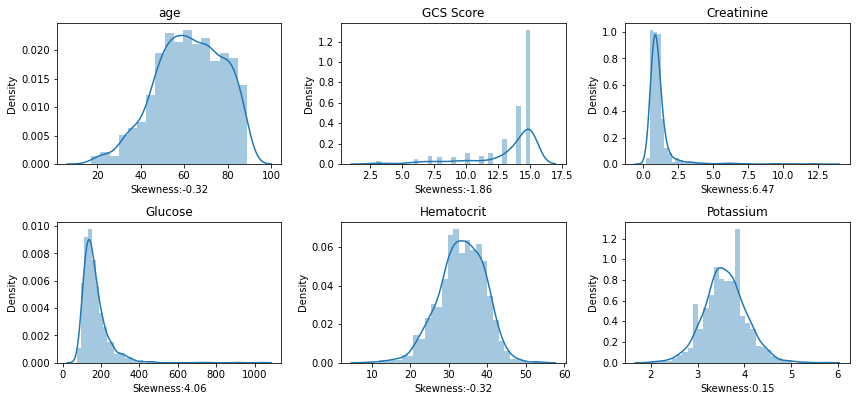

In [13]:
fig = plt.figure(figsize=(12,8))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(3,3,i+1)
    sns.distplot(num_attributes.iloc[:,i].dropna())
    plt.title(num_attributes.columns[i])
    plt.xlabel("Skewness:"+ str(num_attributes.iloc[:,i].skew().round(2)))
    
plt.tight_layout()
plt.show()

Except Hematocrit, Potessium, age, GCS score other variables look highly skewed. I will perform log transformation to those variables (not creatine because values are very small) to make them slightly normally distributed



In [14]:
num_attributes.columns

Index(['age', 'GCS Score', 'Creatinine', 'Glucose', 'Hematocrit', 'Potassium'], dtype='object')

In [15]:
Stroke_Data['Glucose']=np.log(Stroke_Data['Glucose'])
#Stroke_Data['Total duration within study']=np.log(Stroke_Data['Total duration within study'])

In [16]:
# Again checking the distribution
num_attributes = Stroke_Data.select_dtypes(exclude='object').drop('Second Stroke occurred(Yes=1,No=0)', axis=1).copy()

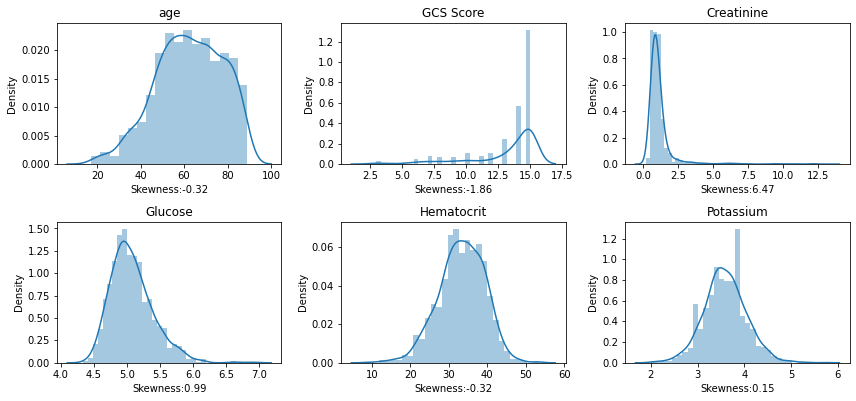

In [17]:
fig = plt.figure(figsize=(12,8))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(3,3,i+1)
    sns.distplot(num_attributes.iloc[:,i].dropna())
    plt.title(num_attributes.columns[i])
    plt.xlabel("Skewness:"+ str(num_attributes.iloc[:,i].skew().round(2)))
    
plt.tight_layout()
plt.show()

In [18]:
correlation = num_attributes.corr()

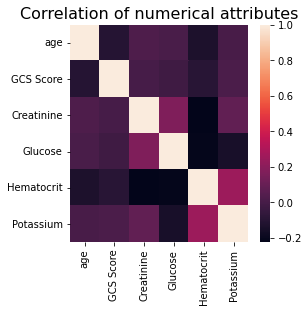

In [19]:
f, ax = plt.subplots(figsize=(4,4))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation)
plt.show()

In [20]:
round(correlation,2)

,age,GCS Score,Creatinine,Glucose,Hematocrit,Potassium
age,1.00,-0.10,0.02,0.01,-0.13,0.01
GCS Score,-0.10,1.00,0.01,-0.02,-0.09,0.02
Creatinine,0.02,0.01,1.00,0.17,-0.22,0.09
Glucose,0.01,-0.02,0.17,1.00,-0.21,-0.15
Hematocrit,-0.13,-0.09,-0.22,-0.21,1.00,0.25
Potassium,0.01,0.02,0.09,-0.15,0.25,1.00


It's good that we don't have significant correlation among independent varibles



In [21]:
# Missing/null values in numerical columns
num_attributes.isna().sum().sort_values(ascending=False).head()

Hematocrit    9
Glucose       9
Creatinine    9
Potassium     8
GCS Score     4
dtype: int64

In [22]:
num_attributes.dtypes

age           float64
GCS Score     float64
Creatinine    float64
Glucose       float64
Hematocrit    float64
Potassium     float64
dtype: object

In [23]:
num_attributes.head()

,age,GCS Score,Creatinine,Glucose,Hematocrit,Potassium
0,42.94,15.0,0.6,4.976734,34.1,3.2
1,69.13,15.0,3.3,5.533389,16.2,3.6
2,55.86,15.0,3.4,5.384495,23.0,3.1
3,54.85,15.0,7.3,6.028279,26.0,2.0
4,58.81,15.0,0.7,5.003946,32.5,3.5


In [24]:
num_attributes.columns

Index(['age', 'GCS Score', 'Creatinine', 'Glucose', 'Hematocrit', 'Potassium'], dtype='object')

In [25]:
num_attributes[num_attributes.isnull().any(axis=1)]

,age,GCS Score,Creatinine,Glucose,Hematocrit,Potassium
174,74.62,NaN,0.6,4.564348,33.8,3.7
309,74.83,15.0,0.9,4.700480,NaN,4.4
468,44.68,14.0,NaN,NaN,18.7,3.5
480,79.75,NaN,NaN,NaN,NaN,NaN
565,62.25,14.0,NaN,NaN,NaN,NaN
617,19.18,15.0,NaN,NaN,NaN,NaN
638,50.64,15.0,NaN,NaN,34.4,NaN
777,63.24,15.0,1.0,5.075174,NaN,4.0
860,64.34,15.0,NaN,NaN,NaN,NaN
898,54.24,12.0,NaN,NaN,NaN,NaN


We can drop these observations because it's around 1% of data from full dataset



In [26]:
Stroke_Data=Stroke_Data.drop(Stroke_Data[num_attributes.isnull().any(axis=1)].index, axis=0)
num_attributes= num_attributes.drop(num_attributes[num_attributes.isnull().any(axis=1)].index, axis=0)
Stroke_Data['Stroke Type'] = Stroke_Data['Stroke Type'].str.replace('Late effects of cerebrovascular disease, cognitive deficits', 'Occlusion and Stenosis of precerebral (OSPA)')

In [27]:
Stroke_Data.head()

,age,Gender,Stroke Type,GCS Score,Creatinine,Glucose,Hematocrit,Potassium,"Second Stroke occurred(Yes=1,No=0)",Marital Status,Ethnicity
0,42.94,F,Intracerebral hemorrhage,15.0,0.6,4.976734,34.1,3.2,1,SINGLE,WHITE
1,69.13,F,Occlusion and Stenosis of precerebral (OSPA),15.0,3.3,5.533389,16.2,3.6,1,SINGLE,BLACK/AFRICAN AMERICAN
2,55.86,F,Intracerebral hemorrhage,15.0,3.4,5.384495,23.0,3.1,1,MARRIED,WHITE
3,54.85,M,Intracerebral hemorrhage,15.0,7.3,6.028279,26.0,2.0,1,MARRIED,WHITE
4,58.81,M,Subarachnoid hemorrhage,15.0,0.7,5.003946,32.5,3.5,1,MARRIED,WHITE


In [28]:
display(Stroke_Data['Gender'].value_counts())
display(Stroke_Data['Stroke Type'].value_counts())
display(Stroke_Data[['Gender', 'Stroke Type', 'Second Stroke occurred(Yes=1,No=0)']].value_counts())

M    637
F    574
Name: Gender, dtype: int64

Intracerebral hemorrhage                        710
Subarachnoid hemorrhage                         379
Occlusion and Stenosis of precerebral (OSPA)    122
Name: Stroke Type, dtype: int64

Gender  Stroke Type                                   Second Stroke occurred(Yes=1,No=0)
M       Intracerebral hemorrhage                      0                                     366
F       Intracerebral hemorrhage                      0                                     283
        Subarachnoid hemorrhage                       0                                     182
M       Subarachnoid hemorrhage                       0                                     138
        Occlusion and Stenosis of precerebral (OSPA)  0                                      64
F       Occlusion and Stenosis of precerebral (OSPA)  0                                      45
M       Intracerebral hemorrhage                      1                                      37
F       Subarachnoid hemorrhage                       1                                      35
M       Subarachnoid hemorrhage                       1                                      24
F       Intracerebral hemorrhage               

## Exploring Categorical variables


In [29]:
cat_columns = Stroke_Data.select_dtypes(include='object')

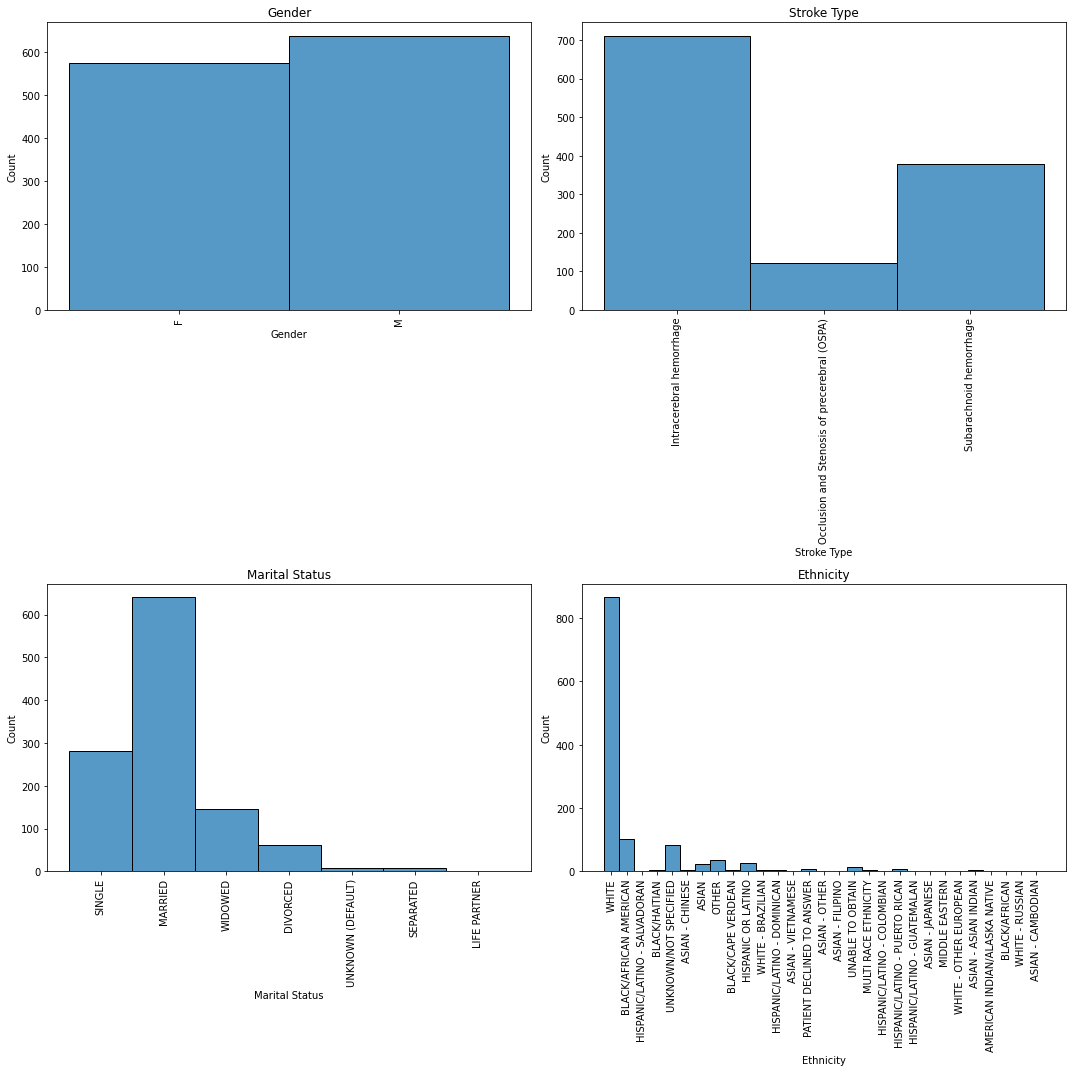

In [30]:
fig = plt.figure(figsize=(15,15))
for i in range(len(cat_columns.columns)):
    fig.add_subplot(2,2,i+1)
    sns.histplot(cat_columns.iloc[:,i])
    plt.title(cat_columns.columns[i])
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In the Ethinicty column maximum of the patients are White. It would not be good to keep this parameter in the dataset because it can overfit the data.



In [31]:
Stroke_Data=Stroke_Data.drop('Ethnicity', axis=1)

In [32]:
Stroke_Data.head()

,age,Gender,Stroke Type,GCS Score,Creatinine,Glucose,Hematocrit,Potassium,"Second Stroke occurred(Yes=1,No=0)",Marital Status
0,42.94,F,Intracerebral hemorrhage,15.0,0.6,4.976734,34.1,3.2,1,SINGLE
1,69.13,F,Occlusion and Stenosis of precerebral (OSPA),15.0,3.3,5.533389,16.2,3.6,1,SINGLE
2,55.86,F,Intracerebral hemorrhage,15.0,3.4,5.384495,23.0,3.1,1,MARRIED
3,54.85,M,Intracerebral hemorrhage,15.0,7.3,6.028279,26.0,2.0,1,MARRIED
4,58.81,M,Subarachnoid hemorrhage,15.0,0.7,5.003946,32.5,3.5,1,MARRIED


DataSet is completely imblanced it is requried Undersampling



In [33]:
# Checking the Output columns
print (len(Stroke_Data[Stroke_Data['Second Stroke occurred(Yes=1,No=0)']==0]))
print(len(Stroke_Data[Stroke_Data['Second Stroke occurred(Yes=1,No=0)']==1]))

1078
133


In the dataset we can see that maximum of the records are no stroke, which causes the dataset to be imbalance. I will do undersampling here to remove the imblalancing by randomly selecting the same no of records as Stroke=1



In [34]:
Stroke_Data_0 = Stroke_Data[Stroke_Data['Second Stroke occurred(Yes=1,No=0)']==0]
Stroke_Data_1 = Stroke_Data[Stroke_Data['Second Stroke occurred(Yes=1,No=0)']==1]

Stroke_Data_0= Stroke_Data_0.sample(n=133, random_state=42)

In [35]:
Stroke_Datav2= pd.concat([Stroke_Data_0, Stroke_Data_1])

In [36]:
# Create target object and call it y
y = Stroke_Datav2['Second Stroke occurred(Yes=1,No=0)']

# One-hot-encoding to transform all categorical data
X = pd.get_dummies(Stroke_Datav2.drop('Second Stroke occurred(Yes=1,No=0)', axis=1), drop_first=True)

## Machine Learning Models

In [37]:
# Split into validation and training data
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

In [38]:
# Importing machine learning module
from sklearn.linear_model import LogisticRegression
from  sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [39]:
def ml_models(train_X, test_X, train_y, test_y ):
    
    Accuracy_in_sample = pd.Series()
    Accuracy_out_sample = pd.Series()
    
    Accuracy_in_sample.index.name = 'Algorithm'
    Accuracy_out_sample.index.name = 'Algorithm'
    cross_tab_in_sample=pd.Series()
    cross_tab_in_sample.index.name = 'Algorithm'
    
    cross_tab_out_sample=pd.Series()
    cross_tab_out_sample.index.name = 'Algorithm'
   
    roc_auc_out_sample=pd.Series()
    roc_auc_out_sample.index.name='Algorithm'
    
    roc_auc_in_sample=pd.Series()
    roc_auc_in_sample.index.name='Algorithm'
  

    # Logistic Regression =================================================
    Logistic_model = LogisticRegression(random_state=42)
    Logistic_model.fit(train_X, train_y)
    log_predictions_out_sample = Logistic_model.predict(test_X)
    log_predictions_in_sample= Logistic_model.predict(train_X)
    Accuracy_in_sample['LogisticRegression'] = accuracy_score(train_y,log_predictions_in_sample)
    Accuracy_out_sample['LogisticRegression'] = accuracy_score(test_y,log_predictions_out_sample)
    cross_tab_out_sample['LogisticRegression']=pd.crosstab(test_y,log_predictions_out_sample)
    cross_tab_in_sample['LogisticRegression']=pd.crosstab(train_y,log_predictions_in_sample)
    roc_auc_out_sample['LogisticRegression']=roc_auc_score(test_y,log_predictions_out_sample)
    roc_auc_in_sample['LogisticRegression']=roc_auc_score(train_y,log_predictions_in_sample)
    #print(classification_report(test_y,log_predictions_out_sample))
    
    
    # Support Vector Machines =================================================
    svc_clf = SVC(C=5.0, random_state=42)
    svc_clf.fit(train_X, train_y)
    log_predictions_out_sample = svc_clf.predict(test_X)
    log_predictions_in_sample= svc_clf.predict(train_X)
    Accuracy_in_sample['SupportVector'] = accuracy_score(train_y,log_predictions_in_sample)
    Accuracy_out_sample['SupportVector'] = accuracy_score(test_y,log_predictions_out_sample)
    cross_tab_out_sample['SupportVector']=pd.crosstab(test_y,log_predictions_out_sample)
    cross_tab_in_sample['SupportVector']=pd.crosstab(train_y,log_predictions_in_sample)
    roc_auc_out_sample['SupportVector']=roc_auc_score(test_y,log_predictions_out_sample)
    roc_auc_in_sample['SupportVector']=roc_auc_score(train_y,log_predictions_in_sample)
    #print(classification_report(test_y,log_predictions_out_sample))

    

    
    # Decision Tree ======================================================
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(train_X, train_y)
    dt_predictions_out_sample = dt_model.predict(test_X)
    dt_predictions_in_sample= dt_model.predict(train_X)
    Accuracy_in_sample['DecisionTree'] = accuracy_score(train_y,dt_predictions_in_sample)
    Accuracy_out_sample['DecisionTree'] = accuracy_score(test_y,dt_predictions_out_sample)
    cross_tab_in_sample['DecisionTree']=pd.crosstab(train_y,dt_predictions_in_sample)
    cross_tab_out_sample['DecisionTree']=pd.crosstab(test_y,dt_predictions_out_sample)
    roc_auc_out_sample['DecisionTree']=roc_auc_score(test_y,dt_predictions_out_sample)
    roc_auc_in_sample['DecisionTree']=roc_auc_score(train_y,dt_predictions_in_sample)

    #print(classification_report(test_y,dt_predictions_out_sample))

    # Random Forest ======================================================
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(train_X, train_y)
    rf_predictions_out_sample = rf_model.predict(test_X)
    rf_predictions_in_sample= rf_model.predict(train_X)
    Accuracy_in_sample['RandomForest'] = accuracy_score(train_y,rf_predictions_in_sample)
    Accuracy_out_sample['RandomForest'] = accuracy_score(test_y,rf_predictions_out_sample)
    cross_tab_out_sample['RandomForest']=pd.crosstab(test_y,rf_predictions_out_sample)
    cross_tab_in_sample['RandomForest']=pd.crosstab(train_y,rf_predictions_in_sample)
    roc_auc_out_sample['RandomForest']=roc_auc_score(test_y,rf_predictions_out_sample)
    roc_auc_in_sample['RandomForest']=roc_auc_score(train_y,rf_predictions_in_sample)
    #print(classification_report(test_y,rf_predictions_out_sample))
        
    # GradientBoosting ===========================================================
    gbr_model = GradientBoostingClassifier(random_state=42)
    gbr_model.fit(train_X, train_y)
    gbr_predictions_out_sample = gbr_model.predict(test_X)
    gbr_predictions_in_sample= gbr_model.predict(train_X)
    
    Accuracy_in_sample['GradientBoosting'] = accuracy_score(train_y,gbr_predictions_in_sample)
    Accuracy_out_sample['GradientBoosting'] = accuracy_score(test_y,gbr_predictions_out_sample)
    cross_tab_out_sample['GradientBoosting']=pd.crosstab(test_y,gbr_predictions_out_sample)
    cross_tab_in_sample['GradientBoosting']=pd.crosstab(train_y,gbr_predictions_in_sample)
    roc_auc_out_sample['GradientBoosting']=roc_auc_score(test_y,gbr_predictions_out_sample)
    roc_auc_in_sample['GradientBoosting']=roc_auc_score(train_y,gbr_predictions_in_sample)
    
    # correlation among output variables
    outputs = {'logistic':log_predictions_out_sample, 'decision_tree':dt_predictions_out_sample, 
              'random_forest': rf_predictions_out_sample, 'gradient_boosting': gbr_predictions_out_sample}
    
    outputs_train = {'logistic':log_predictions_in_sample, 'decision_tree':dt_predictions_in_sample, 
              'random_forest': rf_predictions_in_sample, 'gradient_boosting': gbr_predictions_in_sample}
    output= pd.DataFrame(outputs)
    output_train= pd.DataFrame(outputs_train)
    #print(classification_report(test_y,rf_predictions_out_sample))
    return round(Accuracy_in_sample.sort_values(ascending=True),3), round(Accuracy_out_sample.sort_values(ascending=True),3), cross_tab_out_sample,cross_tab_in_sample, roc_auc_in_sample, roc_auc_out_sample, output, output_train, Logistic_model, dt_model, rf_model, svc_clf

In [40]:
accuracy_in, accuracy_out, cross_tab_out_sample, cross_tab_in_sample, roc_auc_in_sample, roc_auc_out_sample, y_pred, y_train_pred, LR_model, dt_model, rf_model, svc_model=ml_models(train_X, test_X, train_y, test_y)
print('out of sample accuracy:', + accuracy_out)
print('In sample accuracy:', + accuracy_in)
print('AUC in sample:', + roc_auc_in_sample)
print('AUC out of sample:', + roc_auc_out_sample)

out of sample accuracy: Algorithm
DecisionTree          0.493
RandomForest          0.567
SupportVector         0.597
GradientBoosting      0.672
LogisticRegression    0.746
dtype: float64
In sample accuracy: Algorithm
SupportVector         0.553
LogisticRegression    0.648
GradientBoosting      0.990
DecisionTree          1.000
RandomForest          1.000
dtype: float64
AUC in sample: Algorithm
LogisticRegression    0.647008
SupportVector         0.546291
DecisionTree          1.000000
RandomForest          1.000000
GradientBoosting      0.989943
dtype: float64
AUC out of sample: Algorithm
LogisticRegression    0.745968
SupportVector         0.613799
DecisionTree          0.487455
RandomForest          0.565860
GradientBoosting      0.676523
dtype: float64


In [41]:
cross_tab_out_sample[3]

col_0,0,1
"Second Stroke occurred(Yes=1,No=0)",,
0,21,15
1,14,17


In [42]:
from sklearn.metrics import confusion_matrix, roc_curve

# confusion_matrix(y_train_pred, y_pred)

# y_train_pred
# y_pred
dict(cross_tab_in_sample)['LogisticRegression']

col_0,0,1
"Second Stroke occurred(Yes=1,No=0)",,
0,58,39
1,31,71


## Gradient Boosting Hyperparameter Tuning

In [43]:
from sklearn.model_selection import RandomizedSearchCV

# Setting up the tunning parameters
num_estimators = [16,32,64,100, 150]
learn_rates = [0.001, 0.01,0.05,0.075, 0.1, 0.125]
max_depths = [2,3,4, None]
min_samples_split=[2, 4,8,16,32,64]
min_samples_leaf = [2,4,8,16]
param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths,
             'min_samples_split':min_samples_split,
             'min_samples_leaf' : min_samples_leaf}

gbr= GradientBoostingClassifier(random_state=42)
grid_search =RandomizedSearchCV(gbr,param_grid,cv=3,verbose=0, random_state=42)
grid_search.fit(train_X, train_y)

# best parametes
best_param=grid_search.best_params_

print(best_param)
pred_y=grid_search.predict(test_X)
print('test accuracy:',+ accuracy_score(test_y,pred_y))
print('train accuracy:',+ accuracy_score(train_y,grid_search.predict(train_X)))
print('test AUC:',+ roc_auc_score(test_y,pred_y))
print('train AUC:',+ accuracy_score(train_y,grid_search.predict(train_X)))
pd.crosstab(test_y,pred_y)

{'n_estimators': 16, 'min_samples_split': 32, 'min_samples_leaf': 2, 'max_depth': None, 'learning_rate': 0.01}
test accuracy: 0.5074626865671642
train accuracy: 0.7638190954773869
test AUC: 0.5259856630824373
train AUC: 0.7638190954773869


col_0,0,1
"Second Stroke occurred(Yes=1,No=0)",,
0,10,26
1,7,24


## DNN Model

In [44]:
import keras
import tensorflow as tf

In [87]:
from numpy import loadtxt
from numpy.random import seed
seed(1234)
from keras.models import Sequential
from keras.layers import Dense
tf.random.set_seed(1234)

# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=14, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset

In [88]:
history = model.fit(train_X, train_y, epochs=50, batch_size=5)

Epoch 1/50
40/40 [==============================] - 1s 969us/step - loss: 4.4085 - accuracy: 0.5122
Epoch 2/50
40/40 [==============================] - 0s 968us/step - loss: 0.8247 - accuracy: 0.4781
Epoch 3/50
40/40 [==============================] - 0s 1ms/step - loss: 0.7314 - accuracy: 0.4527
Epoch 4/50
40/40 [==============================] - 0s 1ms/step - loss: 0.6691 - accuracy: 0.5964
Epoch 5/50
40/40 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5382
Epoch 6/50
40/40 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.5357
Epoch 7/50
40/40 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.6024
Epoch 8/50
40/40 [==============================] - 0s 1ms/step - loss: 0.6755 - accuracy: 0.5419
Epoch 9/50
40/40 [==============================] - 0s 1ms/step - loss: 0.6748 - accuracy: 0.5674
Epoch 10/50
40/40 [==============================] - 0s 1ms/step - loss: 0.6740 - accuracy: 0.5402
Epoch 11/50
40/

In [89]:
prediction = (model.predict(test_X)>0.5).astype(int)

print('Accuracy of DNN model is: {}'.format(round(accuracy_score(test_y,prediction.flatten()),3)))
pd.crosstab(test_y,prediction.flatten())

Accuracy of DNN model is: 0.612


col_0,0,1
"Second Stroke occurred(Yes=1,No=0)",,
0,17,19
1,7,24


## Accuracy vs Training loss

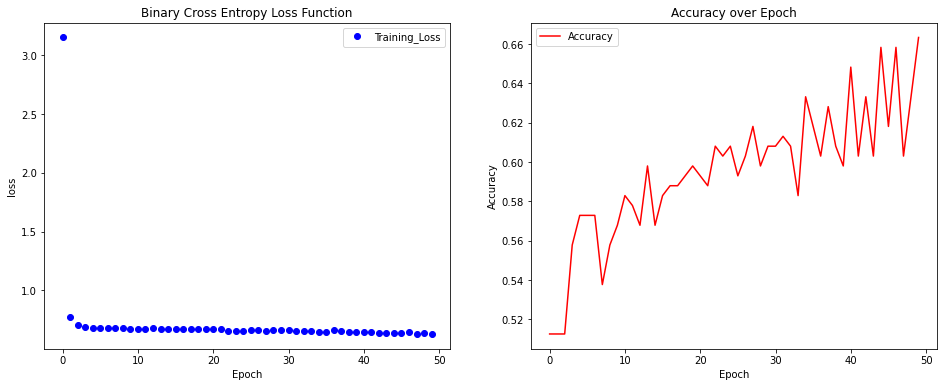

In [90]:
fig = plt.figure(figsize=(16,6))

fig.add_subplot(1,2,1)
plt.plot(history.history['loss'], 'bo', label='Training_Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Binary Cross Entropy Loss Function')
plt.legend()

fig.add_subplot(1,2,2)
plt.plot(history.history['accuracy'], c='r', label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epoch')
plt.legend()

plt.show()

## Second Stroke Prediction Using DNN

In [91]:
# confusion matrix of test data

cm_dnn = pd.DataFrame()
cm_dnn['Test_data'] = test_y
cm_dnn['Predicted_proba'] = model.predict(test_X)
cm_dnn['Prediction'] = round(cm_dnn['Predicted_proba'], 0)
cm_dnn['Prediction'] = cm_dnn['Prediction'].apply(np.int64)

tn, fp, fn, tp = confusion_matrix(cm_dnn['Test_data'], cm_dnn['Prediction']).ravel()

In [92]:
print(f'True Negative = {tn}\nFalse Positive = {fp}\nFalse Negative = {fn}\nTrue Positve = {tp}')

True Negative = 17
False Positive = 19
False Negative = 7
True Positve = 24


In [93]:
# Parameters

print(f'Sensitivity (Sn) = {round(tp*100/(tp+fn), 2)} %')
print(f'Specificity (Sp) = {round(tn*100/(tn+fp), 2)} %')
print(f'Positive Predicted Value (PPV) = {round(tp*100/(tp+fp), 2)} %')
print(f'Accuracy (Acc) = {round((tp+tn)*100/(tp+tn+fp+fn), 2)} %')

Sensitivity (Sn) = 77.42 %
Specificity (Sp) = 47.22 %
Positive Predicted Value (PPV) = 55.81 %
Accuracy (Acc) = 61.19 %


In [94]:
# Roc_auc

dnn_roc_auc = roc_auc_score(test_y, model.predict(test_X))
print(f'The roc auc score of DNN is {round(dnn_roc_auc*100,2)}%')

The roc auc score of DNN is 67.56%


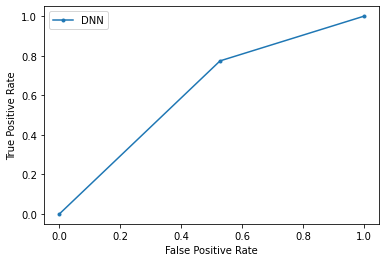

In [95]:
# ROC curve

dnn_fpr, dnn_tpr, _ = roc_curve(cm_dnn['Test_data'], cm_dnn['Prediction'])
plt.plot(dnn_fpr, dnn_tpr, marker='.', label='DNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### ##

In [96]:
cm_LogisticRegression = cross_tab_out_sample['LogisticRegression'] #+ cross_tab_in_sample['LogisticRegression']
cm_DecisionTree = cross_tab_out_sample['DecisionTree']# + cross_tab_in_sample['DecisionTree']
cm_RandomForest = cross_tab_out_sample['RandomForest']# + cross_tab_in_sample['RandomForest']
cm_GradientBoosting = cross_tab_out_sample['GradientBoosting'] #+ cross_tab_in_sample['GradientBoosting'] 
cm_SupportVector = cross_tab_out_sample['SupportVector']#+ cross_tab_in_sample['SupportVector']

In [97]:
cm_models = [cm_LogisticRegression, cm_DecisionTree, cm_RandomForest, cm_GradientBoosting, cm_SupportVector]

models = ['LogisticRegression', 'DecisionTree', 'RandomForest', 'GradientBoosting', 'SupportVector', 'Deep Neural Network']

matrix = []
    
for element in cm_models:
    for i in range(2):
        for j in range(2):
            matrix.append(element.loc[i,j])
            
matrix.extend([tn, fp, fn, tp])

In [98]:
comp_models = pd.DataFrame(np.array(matrix).reshape(6,4), index=models, columns=['TN', 'FP', 'FN', 'TP'])
comp_models

,TN,FP,FN,TP
LogisticRegression,27,9,8,23
DecisionTree,20,16,18,13
RandomForest,21,15,14,17
GradientBoosting,22,14,8,23
SupportVector,14,22,5,26
Deep Neural Network,17,19,7,24


In [99]:
comp_models['Sn(%)'] = round(comp_models['TP']*100/(comp_models['TP']+comp_models['FN']), 2)
comp_models['Sp(%)'] = round(comp_models['TN']*100/(comp_models['TN']+comp_models['FP']), 2)
comp_models['PPV(%)'] = round(comp_models['TP']*100/(comp_models['TP']+comp_models['FP']), 2)
comp_models['Acc(%)'] = round((comp_models['TP']+comp_models['TN'])*100/(comp_models['TP']+comp_models['TN']+comp_models['FP']+comp_models['FN']), 2)

In [100]:
comp_models

,TN,FP,FN,TP,Sn(%),Sp(%),PPV(%),Acc(%)
LogisticRegression,27,9,8,23,74.19,75.00,71.88,74.63
DecisionTree,20,16,18,13,41.94,55.56,44.83,49.25
RandomForest,21,15,14,17,54.84,58.33,53.12,56.72
GradientBoosting,22,14,8,23,74.19,61.11,62.16,67.16
SupportVector,14,22,5,26,83.87,38.89,54.17,59.70
Deep Neural Network,17,19,7,24,77.42,47.22,55.81,61.19


In [101]:
# roc_auc_in_sample

roc_auc_in_sample*100

Algorithm
LogisticRegression     64.700829
SupportVector          54.629068
DecisionTree          100.000000
RandomForest          100.000000
GradientBoosting       98.994340
dtype: float64

In [102]:
# roc_auc_out_sample

roc_auc_out_sample*100

Algorithm
LogisticRegression    74.596774
SupportVector         61.379928
DecisionTree          48.745520
RandomForest          56.586022
GradientBoosting      67.652330
dtype: float64

In [103]:
###

cm_dnn['LR_predict'] = LR_model.predict(test_X)
cm_dnn['DT_predict'] = dt_model.predict(test_X)
cm_dnn['RF_predict'] = rf_model.predict(test_X)
cm_dnn['GBR_predict'] = grid_search.predict(test_X)
cm_dnn['SV_predict'] = svc_model.predict(test_X)

In [104]:
#cm_dnn.head()

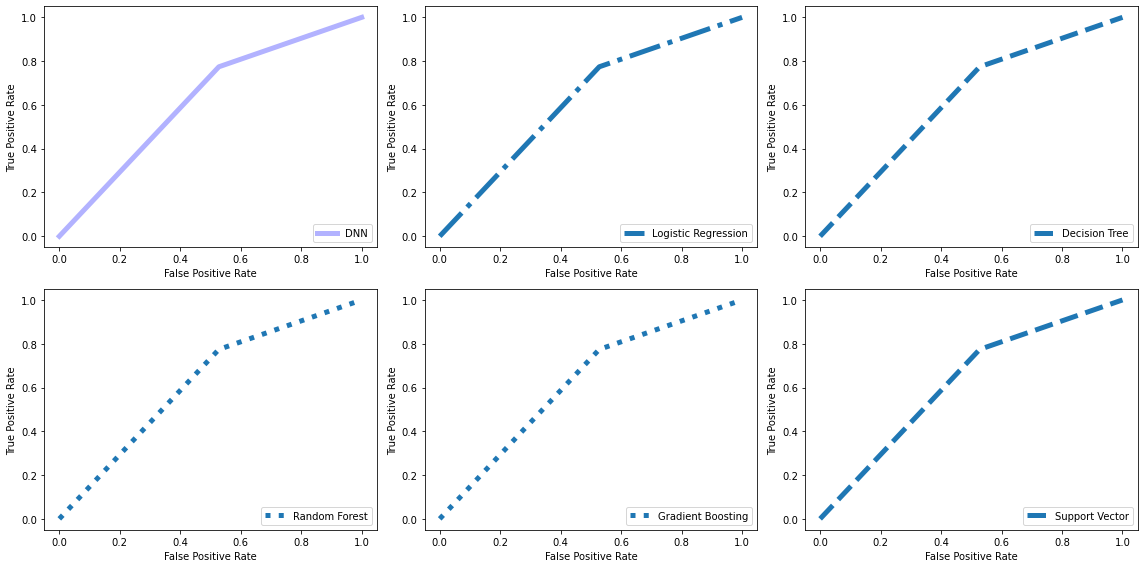

In [105]:
# ROC curve

fig = plt.figure(figsize=(16,8))

# DNN
fig.add_subplot(2,3,1)
dnn_fpr, dnn_tpr, _ = roc_curve(cm_dnn['Test_data'], cm_dnn['Prediction'])
plt.plot(dnn_fpr, dnn_tpr, c='b', lw=5.0, alpha=0.3, label='DNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# LogisticRegression
fig.add_subplot(2,3,2)
lr_fpr, lr_tpr, _ = roc_curve(cm_dnn['Test_data'], cm_dnn['LR_predict'])
plt.plot(dnn_fpr, dnn_tpr, lw=5.0, linestyle='-.', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# DecisionTree
fig.add_subplot(2,3,3)
dt_fpr, dt_tpr, _ = roc_curve(cm_dnn['Test_data'], cm_dnn['DT_predict'])
plt.plot(dnn_fpr, dnn_tpr, lw=5.0, linestyle='--',label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# RandomForest
fig.add_subplot(2,3,4)
rf_fpr, rf_tpr, _ = roc_curve(cm_dnn['Test_data'], cm_dnn['RF_predict'])
plt.plot(dnn_fpr, dnn_tpr, lw=5.0, linestyle=':', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# GradientBoosting
fig.add_subplot(2,3,5)
gbr_fpr, gbr_tpr, _ = roc_curve(cm_dnn['Test_data'], cm_dnn['GBR_predict'])
plt.plot(dnn_fpr, dnn_tpr, lw=5.0, linestyle=':', label='Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# SupportVector
fig.add_subplot(2,3,6)
sv_fpr, sv_tpr, _ = roc_curve(cm_dnn['Test_data'], cm_dnn['SV_predict'])
plt.plot(dnn_fpr, dnn_tpr, lw=5.0, linestyle='--', label='Support Vector')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()